# **EarthQuake Dataset**

## **Questionaries**

**Q#1 Insurance Risk Modeling:**

Create advanced earthquake risk models to help insurance companies accurately assess potential losses, set precise premiums, and manage risk effectively.

**Q#2 Infrastructure Investment Optimization:**

 Optimize resource allocation for earthquake-resilient infrastructure, prioritizing upgrades and planning for future construction in high-risk areas.

**Q#3 Supply Chain Resilience:**

Develop strategies using earthquake data to enhance supply chain resilience, diversify suppliers, manage inventory, and minimize disruptions during seismic events.

**Sustainable Development Goals**


**SDG 11:** Sustainable Cities and Communities: Earthquake data analysis can help improve urban planning and resilience in earthquake-prone areas, making cities and communities more sustainable and disaster-resilient.

# **Data Preparation**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier  # Add this import
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# **Data Mining**



In [2]:
data = pd.read_csv("/content/all_month.csv")

In [3]:
print(data.head())

                       time   latitude   longitude   depth   mag magType  \
0  2023-09-17T02:13:39.562Z  60.022400 -153.498700  156.50  2.30      ml   
1  2023-09-17T02:12:01.910Z  32.981500 -116.290333    8.95  0.77      ml   
2  2023-09-17T01:51:45.400Z  18.234100  -68.375800   71.00  3.77      md   
3  2023-09-17T01:51:30.740Z  35.778833 -117.493667    1.75  0.56      ml   
4  2023-09-17T01:20:01.408Z  65.100800 -148.934600   29.40  1.80      ml   

    nst    gap     dmin   rms  ...                   updated  \
0   NaN    NaN      NaN  0.20  ...  2023-09-17T02:15:37.352Z   
1  19.0  101.0  0.02898  0.20  ...  2023-09-17T02:15:43.081Z   
2  10.0  258.0  0.27990  0.46  ...  2023-09-17T02:15:25.268Z   
3  12.0  189.0  0.12700  0.11  ...  2023-09-17T01:55:10.022Z   
4   NaN    NaN      NaN  0.95  ...  2023-09-17T01:23:40.543Z   

                            place        type horizontalError depthError  \
0   42 km NE of Pedro Bay, Alaska  earthquake             NaN       0.60   
1  23 

In [4]:
print(data.shape)
data.columns
data.info()

(10362, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10362 entries, 0 to 10361
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             10362 non-null  object 
 1   latitude         10362 non-null  float64
 2   longitude        10362 non-null  float64
 3   depth            10362 non-null  float64
 4   mag              10362 non-null  float64
 5   magType          10362 non-null  object 
 6   nst              7829 non-null   float64
 7   gap              7829 non-null   float64
 8   dmin             6001 non-null   float64
 9   rms              10362 non-null  float64
 10  net              10362 non-null  object 
 11  id               10362 non-null  object 
 12  updated          10362 non-null  object 
 13  place            10362 non-null  object 
 14  type             10362 non-null  object 
 15  horizontalError  7249 non-null   float64
 16  depthError       10362 non-null  float64
 17  

# **Data Cleaning**

In [5]:
# Check for missing values
missing_values = data.isnull().sum()

In [6]:
# Drop rows with missing values
data = data.dropna()

In [7]:

# Handle duplicate rows
data = data.drop_duplicates()

In [12]:
# Handle outliers
# Example: Remove earthquakes with magnitudes below 2.0
data = data[data['mag'] >= 2.0]

In [13]:
# Convert date columns to datetime format
data['Time'] = pd.to_datetime(data['time'])


In [14]:
# Check for inconsistent or erroneous data (e.g., negative values, unrealistic values)
# Example: Remove earthquakes with negative magnitudes or depths
data = data[(data['mag'] >= 0) & (data['depth'] >= 0)]

In [15]:
# Optionally, you can reindex the cleaned dataset
data = data.reset_index(drop=True)

In [16]:
# Save the cleaned dataset to a new file or overwrite the original
data.to_csv("cleaned_earthquake.csv", index=False)

In [17]:
columns_to_keep = [
    'time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'rms',
    'id', 'updated', 'place', 'type', 'depthError', 'status', 'locationSource', 'magSource'
]

# Use the drop method to remove the extra columns
data = data[columns_to_keep]


# **Data Exploration**

In [18]:
print("Dataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1758 entries, 0 to 1757
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            1758 non-null   object 
 1   latitude        1758 non-null   float64
 2   longitude       1758 non-null   float64
 3   depth           1758 non-null   float64
 4   mag             1758 non-null   float64
 5   magType         1758 non-null   object 
 6   rms             1758 non-null   float64
 7   id              1758 non-null   object 
 8   updated         1758 non-null   object 
 9   place           1758 non-null   object 
 10  type            1758 non-null   object 
 11  depthError      1758 non-null   float64
 12  status          1758 non-null   object 
 13  locationSource  1758 non-null   object 
 14  magSource       1758 non-null   object 
dtypes: float64(6), object(9)
memory usage: 206.1+ KB
None


In [19]:
print("\nSummary Statistics:")
print(data.describe())



Summary Statistics:
          latitude    longitude        depth          mag          rms  \
count  1758.000000  1758.000000  1758.000000  1758.000000  1758.000000   
mean     21.052196   -44.204716    53.213855     3.463224     0.449352   
std      25.624231   109.139340   105.590223     1.067746     0.302311   
min     -65.899300  -179.971800     0.024455     2.000000     0.020000   
25%       7.255775  -119.167458     8.239624     2.410000     0.200000   
50%      31.116028   -79.498950    11.328500     3.400000     0.390000   
75%      37.748050    39.153050    42.668750     4.400000     0.670000   
max      85.457400   179.989900   660.178000     7.100000     1.500000   

        depthError  
count  1758.000000  
mean      3.844583  
std       4.694536  
min       0.110000  
25%       0.828883  
50%       1.936000  
75%       5.935000  
max      31.610000  


In [20]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
time              0
latitude          0
longitude         0
depth             0
mag               0
magType           0
rms               0
id                0
updated           0
place             0
type              0
depthError        0
status            0
locationSource    0
magSource         0
dtype: int64


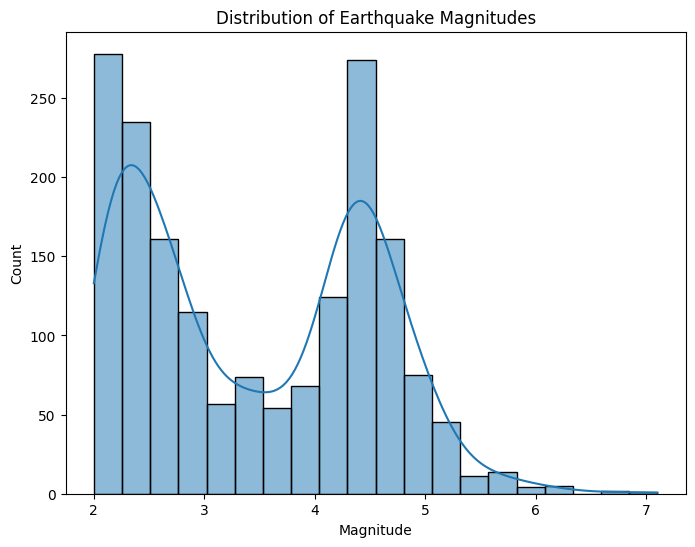

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(data['mag'], bins=20, kde=True)
plt.xlabel('Magnitude')
plt.ylabel('Count')
plt.title('Distribution of Earthquake Magnitudes')
plt.show()

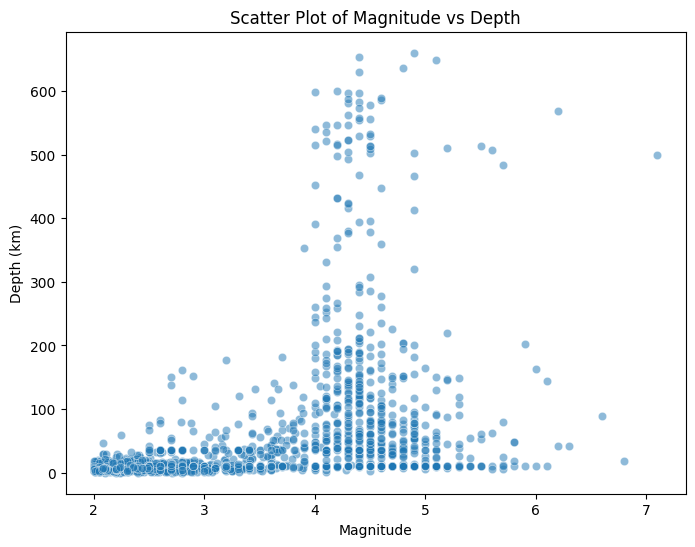

In [23]:
# Explore the relationship between magnitude and depth
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='mag', y='depth', alpha=0.5)
plt.xlabel('Magnitude')
plt.ylabel('Depth (km)')
plt.title('Scatter Plot of Magnitude vs Depth')
plt.show()


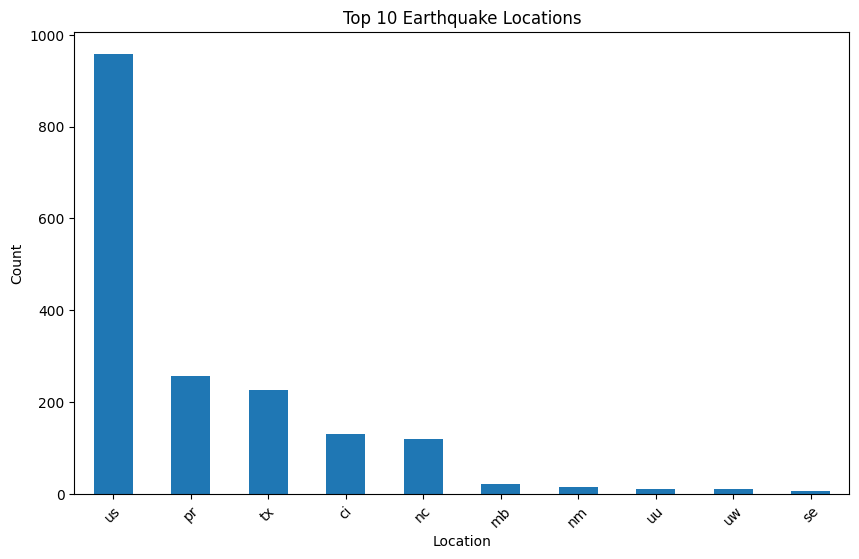

In [24]:
# Explore the top earthquake locations
top_locations = data['locationSource'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_locations.plot(kind='bar')
plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Top 10 Earthquake Locations')
plt.xticks(rotation=45)
plt.show()

# **Business Insights**

**For Insurance Risk Modeling:**
- "Our dataset exploration guides the creation of advanced risk models, enabling precise loss assessment, accurate premium setting, and effective risk management for insurance companies."

**For Infrastructure Investment Optimization :**
- "Dataset insights inform resource allocation, helping prioritize earthquake-resilient infrastructure upgrades in high-risk areas, ensuring efficient investment planning."

**For Supply Chain Resilience:**
- "Dataset analysis aids in developing resilient supply chain strategies, including supplier diversification, inventory optimization, and disaster response planning, minimizing disruptions during seismic events."


# **Feature Enginering**

In [26]:
# Loading dataset
data = pd.read_csv('/content/all_month.csv')

# Step 1: Convert time and updated columns to datetime objects
data['time'] = pd.to_datetime(data['time'])
data['updated'] = pd.to_datetime(data['updated'])

# Step 2: Extract date-related features from time and updated columns
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month
data['day'] = data['time'].dt.day
data['hour'] = data['time'].dt.hour
data['minute'] =data['time'].dt.minute

# Step 3: Create a new feature for the distance from a reference point (e.g., epicenter)
# Assuming a reference latitude and longitude
reference_latitude = 0.0
reference_longitude = 0.0
data['distance_from_reference'] = ((data['latitude'] - reference_latitude)**2 +
                                (data['longitude'] - reference_longitude)**2)**0.5

# Step 4: Encode categorical columns using one-hot encoding
categorical_columns = ['magType', 'type', 'status', 'locationSource', 'magSource']
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Step 5: Standardize numerical features (e.g., depth, mag, rms, depthError)
from sklearn.preprocessing import StandardScaler

numerical_columns = ['depth', 'mag', 'rms', 'depthError']
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Display the updated DataFrame
print(data.head())


                              time   latitude   longitude     depth       mag  \
0 2023-09-17 02:13:39.562000+00:00  60.022400 -153.498700  2.585224  0.648817   
1 2023-09-17 02:12:01.910000+00:00  32.981500 -116.290333 -0.264471 -0.644036   
2 2023-09-17 01:51:45.400000+00:00  18.234100  -68.375800  0.933927  1.890970   
3 2023-09-17 01:51:30.740000+00:00  35.778833 -117.493667 -0.403528 -0.821487   
4 2023-09-17 01:20:01.408000+00:00  65.100800 -148.934600  0.130489  0.226316   

    nst    gap     dmin       rms net  ... magSource_nc magSource_nm  \
0   NaN    NaN      NaN -0.329911  ak  ...            0            0   
1  19.0  101.0  0.02898 -0.329911  ci  ...            0            0   
2  10.0  258.0  0.27990  0.668074  pr  ...            0            0   
3  12.0  189.0  0.12700 -0.675367  ci  ...            0            0   
4   NaN    NaN      NaN  2.548893  ak  ...            0            0   

  magSource_nn  magSource_ok  magSource_pr  magSource_se  magSource_tx  \
0     

# **Business Insights for feature Engineering**

**For Insurance Risk Modeling:**
Feature engineering enhances insurance risk models by converting data into useful features. This involves creating time-related, geographical, and categorical features, standardizing numerical data, and incorporating domain-specific knowledge to improve risk assessment.

**For Infrastructure Investment Optimization:**
Feature engineering aids in efficient infrastructure investment decisions. It involves creating features based on asset characteristics, economic indicators, spatial data, time series analysis, risk assessment, and regulatory compliance to prioritize and plan infrastructure projects effectively.

**For Supply Chain Resilience:**
In supply chain resilience, feature engineering optimizes operations by creating features for demand forecasting, supplier performance, inventory management, transportation metrics, market trends, and event-based factors. This helps in adapting to disruptions and ensuring continuous supply chain operations.

# **Business Insights for Predictive modeling**

**Q#1 Insurance Risk Modeling:**
The binary classification model identifies significant earthquakes, helping insurance companies assess risk, determine premiums, and manage claims effectively.

**Q#2 Infrastructure Investment Optimization:**
The model aids in selecting safe sites for critical infrastructure, mitigating earthquake risk, and optimizing investment decisions.

**Q#3 Supply Chain Resilience:**
Businesses use the model to map earthquake risk, plan emergency responses, and make supply chain decisions that enhance resilience during seismic events.

In [27]:
#Earthquake Detection or Classification (Binary Classification):
data = pd.read_csv('/content/all_month.csv')

# Create a binary label for earthquakes (1) and non-earthquakes (0) based on the 'mag' column
threshold_value = 4.0
data['earthquake_label'] = (data['mag'] >= threshold_value).astype(int)

# Define features and target
X = data[['latitude', 'longitude', 'depth', 'nst', 'gap', 'dmin', 'rms']]
y = data['earthquake_label']

# Drop rows with NaN values from X and corresponding rows from y
X = X.dropna()
y = y.loc[X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Classifier model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model using various metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Accuracy: 0.99
Precision: 0.99
Recall: 0.97
F1 Score: 0.98


# **Data Visualization**

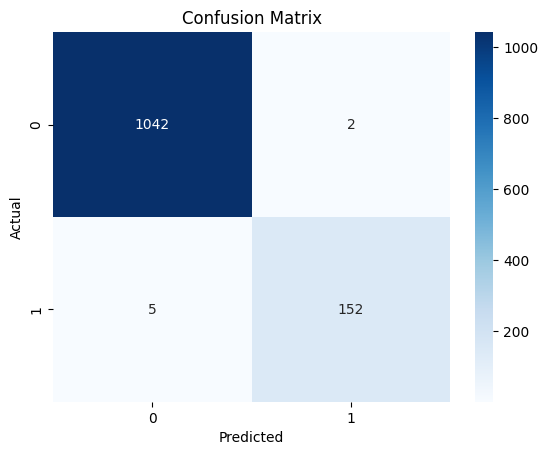

In [32]:
# Assuming 'y_test' contains the true labels and 'predictions' contains the predicted labels
conf_matrix = confusion_matrix(y_test, predictions)

# Now you can proceed with the rest of your code for plotting the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


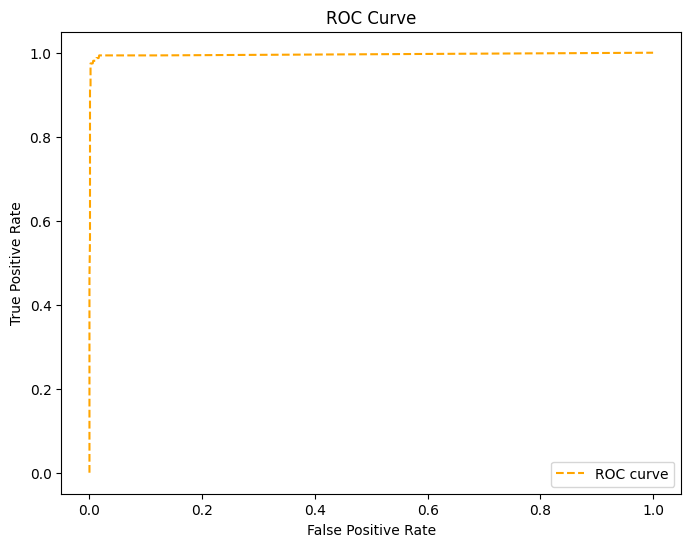

AUC: 1.00


In [33]:
#Data visualization using ROC curve
from sklearn.metrics import roc_curve, roc_auc_score

probs = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, linestyle='--', color='orange', label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

auc = roc_auc_score(y_test, probs)
print(f"AUC: {auc:.2f}")

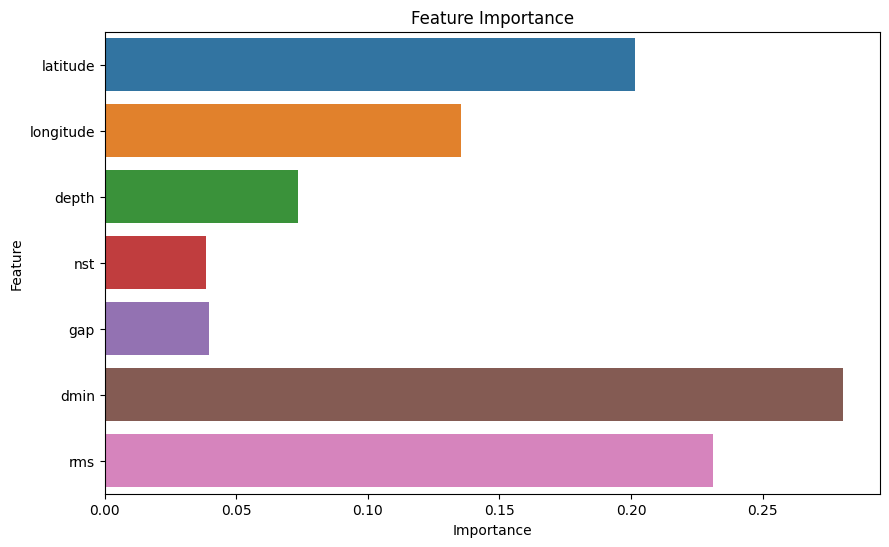

In [35]:
#features that are important in visualization
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, orient='h')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


# **Business insights for data visualization**

**Q#1 Insurance Risk Modeling:**

-**Confusion Matrix:** Assesses model accuracy for earthquake risk assessment and informs premium pricing and claims management.
- **ROC Curve and AUC:** Evaluates the model's ability to identify high-risk areas, guiding resource allocation and pricing.
- **Feature Importance:** Identifies key factors influencing earthquake risk for informed underwriting decisions.

**Q#2 Infrastructure Investment Optimization:**
- **Confusion Matrix:** Guides site selection and risk mitigation for cost-effective infrastructure development.
- **ROC Curve and AUC:** Assesses model reliability in site selection for infrastructure projects.
- **Feature Importance:** Identifies critical geographic and seismic factors for optimal investments.

**Q#3 Supply Chain Resilience:**
- **Confusion Matrix:** Enhances supply chain resilience by assessing model accuracy in predicting seismic events.
- **ROC Curve and AUC:** Helps map earthquake risks along the supply chain for better emergency planning.
- **Feature Importance:** Identifies vulnerabilities in supply chain dependencies for improved resilience.